#           Project Title: Grocery Store Data Analysis
## Overview:
#### --Analyzing a grocery store dataset to understand customer behavior, popular products, and Rating.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('GroceryDataset.csv')

In [3]:
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB
None


In [5]:
# Display summary statistics
print(df.describe())

       Sub Category    Price     Discount      Rating  \
count          1757     1754         1757         682   
unique           19      184           42         483   
top          Snacks  $14.99   No Discount  No Reviews   
freq            293       81         1626          61   

                                                    Title Currency  \
count                                                1757     1752   
unique                                               1484        1   
top     Ziploc Seal Top Freezer Bag, Gallon, 38-count,...        $   
freq                                                    4     1752   

                                                  Feature  \
count                                                1739   
unique                                               1401   
top     Pick Your Arrival Date at Checkout   Gift Mess...   
freq                                                    7   

                                      Product Description

In [6]:
# Check for missing values
print(df.isnull().sum())

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64


In [7]:
# Fill null Values

df['Rating'].fillna('No Reviews', inplace=True)
df = df.dropna(subset=['Price'])

In [8]:
# Check for missing values
print(df.isnull().sum())

Sub Category            0
Price                   0
Discount                0
Rating                  0
Title                   0
Currency                2
Feature                18
Product Description    42
dtype: int64


In [9]:
# Top 30 Rated Products
rating_products = []
for index, row in df.iterrows():
    value1 = row['Rating']
    value2 = row['Title']
    if value1 != "No Reviews" and value1 != "through":
        v=value1[6:9]+" "+value2
        vv=value1[6:8]+" "+value2
        if v[1]=='.':
            rating_products.append(v)
        else:
            rating_products.append(vv)
r = []
rr = []
tp = {"Rating":r,"Product":rr}
for i in rating_products:
    if i[1]==".":
        r.append(i[:3])
        rr.append(i[3:])
    else:
        r.append(i[0])
        rr.append(i[3:])
data =pd.DataFrame(tp)
data['Rating'] = data['Rating'].astype(float)
top_30 = data.sort_values(by='Rating', ascending=False).head(30)
print(top_30)

     Rating                                            Product
453     5.0  Portoro Australian Primal Beef Striploin - 1 T...
585     5.0  G2G 3-pack Almond Chocolate Chip Protein Bars,...
44      5.0  Pulp & Press Organic Cold-Pressed Juice Variet...
522     5.0  Artstyle Paper Plate & Napkin Bundle, Year of ...
155     5.0      Plaza Golden Osetra Caviar Kilo Pack, 35.2 oz
528     5.0  Eco Raj 12 oz Compostable Bagasse Bowl, 1000-c...
1       5.0  The Cake Bake Shop 8" Round Carrot Cake (16-22...
33      5.0        Joyburst Energy Variety, 12 fl oz, 18-count
298     5.0      Old Fashioned Whiskey Time & Snacks Gift Set 
295     5.0      Plaza Golden Osetra Caviar Kilo Pack, 35.2 oz
395     5.0  Sampler: Dry-Cured Acorn-Fed 100% Iberico Pork...
486     5.0  Namaste Gluten Free Waffle & Pancake Mix 3 lb ...
580     5.0  G2G 3-pack Peanut Butter & Jelly Protein Bars,...
484     5.0                  eat.art Salt and Spice Set 2-pack
278     5.0                         TRE Olive Merenda G

In [10]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace('through-', '')
df['Price'] = df['Price'].str.replace(' ', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = [i[:5] if i[2] == "." and len(i) == 10 else i[:6] if i[3] == "." and len(i) == 12 else i[:5] if i[2] == "." and len(i) == 11 else i for i in df['Price']]
df['Price'] = df['Price'].astype(float)

df.groupby('Sub Category')["Price"].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\1329420383.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\1329420383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\1329420383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Sub Category
Bakery & Desserts                2752.67
Beverages & Water                5432.12
Breakfast                         279.39
Candy                            3860.66
Cleaning Supplies                2853.56
Coffee                           3123.65
Deli                             7784.79
Floral                           5398.25
Gift Baskets                    10568.11
Household                        2295.19
Kirkland Signature Grocery       3430.58
Laundry Detergent & Supplies     1321.91
Meat & Seafood                  32828.55
Organic                           739.87
Pantry & Dry Goods               4976.69
Paper & Plastic Products         2230.32
Poultry                          1279.92
Seafood                          9189.51
Snacks                           6288.48
Name: Price, dtype: float64

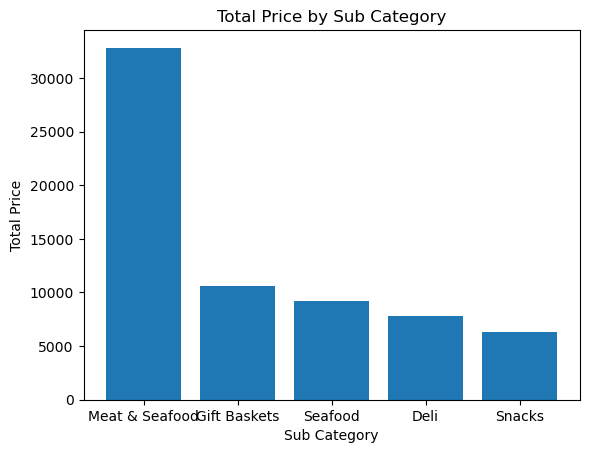

In [11]:
grouped_data = df.groupby('Sub Category')["Price"].sum().reset_index()
top_5 = grouped_data.sort_values(by='Price', ascending=False).head(5)
top_5

# Plotting the data using a bar chart
plt.bar(top_5['Sub Category'],top_5['Price'])
plt.xlabel('Sub Category')
plt.ylabel('Total Price')
plt.title('Total Price by Sub Category')
plt.show()

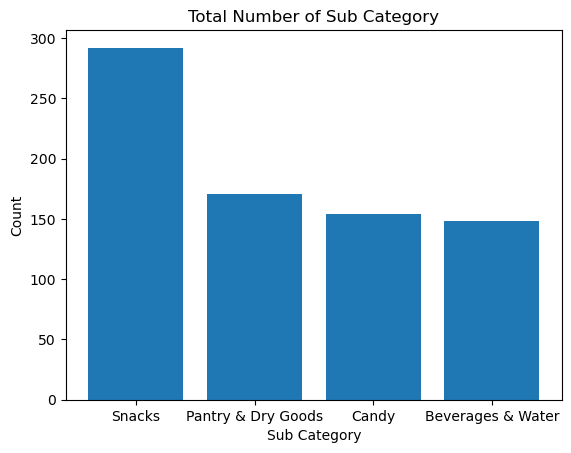

In [12]:
Sub_category_counts = df['Sub Category'].value_counts().reset_index()
top_4 = Sub_category_counts.sort_values(by='Sub Category', ascending=False).head(4)
plt.bar(top_4['index'],top_4['Sub Category'])
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.title('Total Number of Sub Category')
plt.show()